In [ ]:
import pandas as pd
df = pd.read_csv('ensemble_results.csv')
df

In [ ]:
actual = df['label']

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')

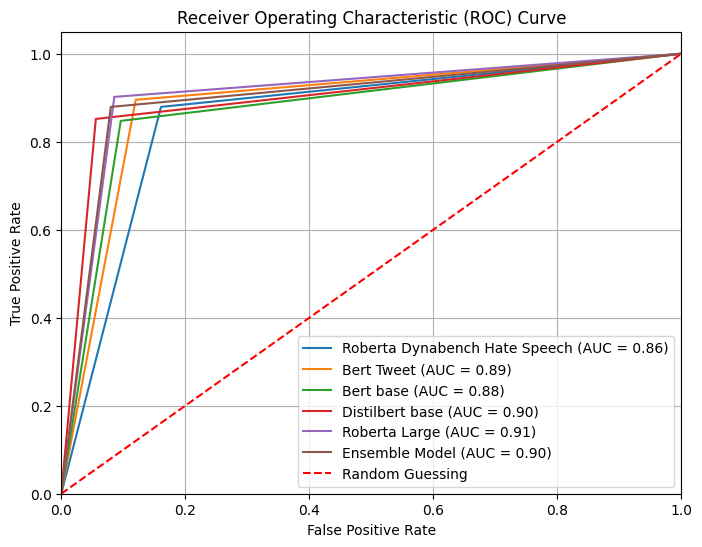

In [ ]:
roberta_results = df['roberta_results']
btweet_results = df['btweet_results']
bert_results = df['bert_results']
distil_results = df['distil_results']
rlarge_results = df['rlarge_results']
ensemble_results = df['ensemble']

plt.figure(figsize=(8, 6))
plot_roc_curve(actual, roberta_results, 'Roberta Dynabench Hate Speech')
plot_roc_curve(actual, btweet_results, 'Bert Tweet')
plot_roc_curve(actual, bert_results, 'Bert base')
plot_roc_curve(actual, distil_results, 'Distilbert base')
plot_roc_curve(actual, rlarge_results, 'Roberta Large')
plot_roc_curve(actual, ensemble_results, 'Ensemble Model')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
plt.savefig('roc_results.jpg')

<Figure size 640x480 with 0 Axes>

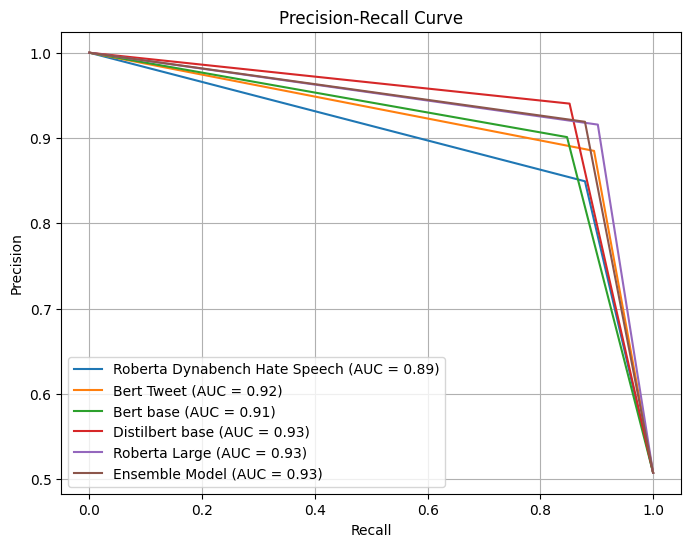

In [ ]:
plt.figure(figsize=(8, 6))
plot_precision_recall_curve(actual, roberta_results, 'Roberta Dynabench Hate Speech')
plot_precision_recall_curve(actual, btweet_results, 'Bert Tweet')
plot_precision_recall_curve(actual, bert_results, 'Bert base')
plot_precision_recall_curve(actual, distil_results, 'Distilbert base')
plot_precision_recall_curve(actual, rlarge_results, 'Roberta Large')
plot_precision_recall_curve(actual, ensemble_results, 'Ensemble Model')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [ ]:
plt.savefig('precision_recall.jpg')

<Figure size 640x480 with 0 Axes>

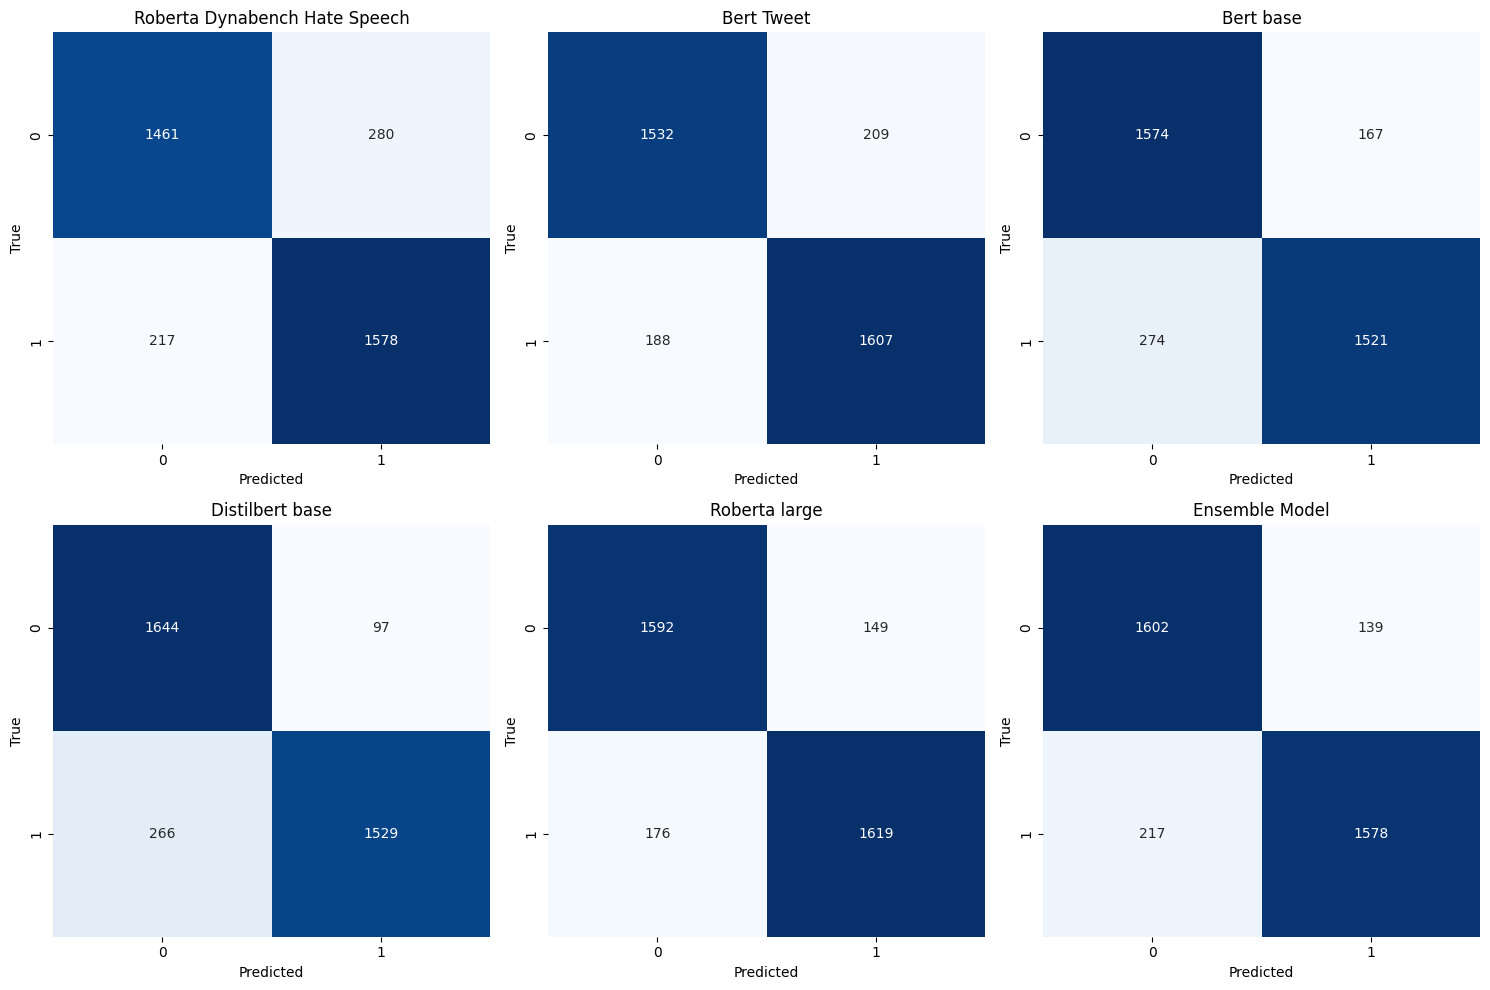

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

res = [roberta_results, btweet_results, bert_results, distil_results, rlarge_results, ensemble_results]
names = ['Roberta Dynabench Hate Speech', 'Bert Tweet', 'Bert base', 'Distilbert base', 'Roberta large', 'Ensemble Model']

plt.figure(figsize=(15, 10))
for i, y_pred in enumerate(res):
    plt.subplot(2, 3, i + 1)
    cm = confusion_matrix(actual, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(names[i])
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

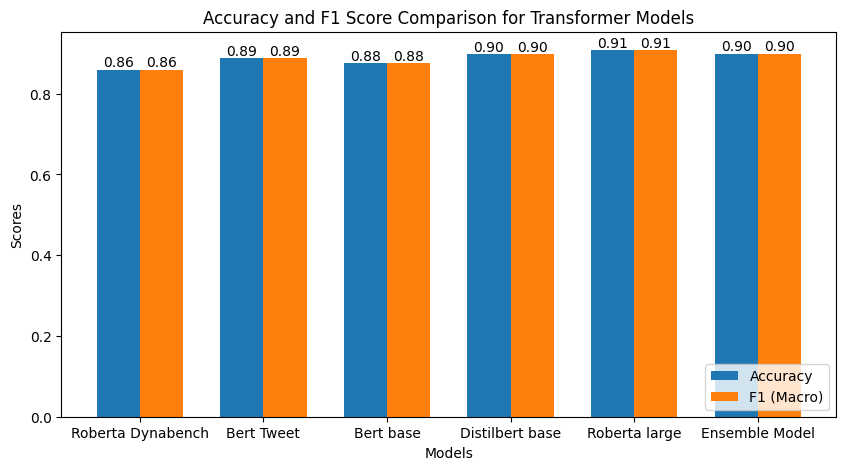

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

accuracy_scores = [accuracy_score(actual, y_pred) for y_pred in res]
f1_scores = [f1_score(actual, y_pred, average='macro') for y_pred in res]

names = ['Roberta Dynabench', 'Bert Tweet', 'Bert base', 'Distilbert base', 'Roberta large', 'Ensemble Model']
plt.figure(figsize=(10, 5))
x = np.arange(len(names))
width = 0.35
bars1 = plt.bar(x - width/2, accuracy_scores, width, label='Accuracy')
bars2 = plt.bar(x + width/2, f1_scores, width, label='F1 (Macro)')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy and F1 Score Comparison for Transformer Models')
plt.xticks(x, names)
plt.legend(loc = 'lower right')

# Add text labels for values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()